In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

#

In [58]:
data = pd.read_excel('THONGKESVISHOCTUCHON.xlsx', sheet_name='Dulieu0205' )
data.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1


In [59]:
df = pd.read_excel('THONGKESVISHOCTUCHON.xlsx', sheet_name='DS môn TC', skiprows=1)
df.head()

,HK,Mã môn,Tên Môn,HK.1,Thuoc KCNTT
0,2,3240,Hàm phức và phép biến đổi Laplace,2,0
1,2,3395,Logic học,2,0
2,2,3320,Phương pháp tính,2,0
3,2,3193,Toán ứng dụng,2,0
4,2,3345,Vật lý đại cương,2,0


In [60]:
#megre 2 bảng dữ liệu

df_megre = pd.merge(data, df, left_on='MaMonHoc', right_on='Mã môn')
#drop HK.1 
df_megre.drop(['HK.1','Thuoc KCNTT','Mã môn'], axis=1, inplace=True)
df_megre.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HK,Tên Môn
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,3,Kỹ năng xây dựng kế hoạch
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,4,Âm nhạc – Nhạc lý và Guitar căn bản
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,2,Logic học
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,5,Tương tác người máy
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,4,Cấu trúc rời rạc


### Data checks to perform

- Check missing values

In [61]:
df_megre.isna().sum()

GioiTinh         0
IDLopHoc         0
IDSinhVien       0
MaMonHoc         0
TenDot           0
DiemTongKet    655
Thuộc KCNTT      0
HK               0
Tên Môn          0
dtype: int64

In [62]:
mean_diem = round(float(df_megre['DiemTongKet'].mean()),2)
mean_diem

7.11

In [63]:
# Có cột "DiemTongKet" có giá trị NULL, ta sẽ thay thế các giá trị NULL bằng mean của cột DiemTongKet
df_megre['DiemTongKet'].fillna(mean_diem, inplace=True)

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\2696386040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_megre['DiemTongKet'].fillna(mean_diem, inplace=True)


- Check duplicates

In [64]:
df_megre.duplicated().sum()

0

- Check data types

In [65]:
df_megre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GioiTinh     4670 non-null   int64  
 1   IDLopHoc     4670 non-null   int64  
 2   IDSinhVien   4670 non-null   int64  
 3   MaMonHoc     4670 non-null   int64  
 4   TenDot       4670 non-null   object 
 5   DiemTongKet  4670 non-null   float64
 6   Thuộc KCNTT  4670 non-null   int64  
 7   HK           4670 non-null   int64  
 8   Tên Môn      4670 non-null   object 
dtypes: float64(1), int64(6), object(2)
memory usage: 328.5+ KB


- Check unique value

In [66]:
df_megre.nunique()

GioiTinh         2
IDLopHoc        11
IDSinhVien     591
MaMonHoc        34
TenDot          15
DiemTongKet     76
Thuộc KCNTT      2
HK               6
Tên Môn         34
dtype: int64

- Statistics of data

In [67]:
df_megre.describe()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,DiemTongKet,Thuộc KCNTT,HK
count,4670.000000,4670.000000,4.670000e+03,4670.000000,4670.000000,4670.000000,4670.000000
mean,0.233619,26493.484154,1.704986e+06,2791.690364,7.110032,0.354818,4.493790
std,0.423178,367.124262,1.323973e+04,1501.844080,1.701945,0.478509,1.464312
min,0.000000,25933.000000,1.677250e+06,901.000000,0.000000,0.000000,2.000000
25%,0.000000,26153.000000,1.695106e+06,1366.000000,6.700000,0.000000,4.000000
50%,0.000000,26421.000000,1.704675e+06,3206.000000,7.200000,0.000000,5.000000
75%,0.000000,26961.000000,1.713225e+06,3395.000000,8.100000,1.000000,5.000000
max,1.000000,27277.000000,1.737233e+06,10665.000000,10.000000,1.000000,7.000000


- Exploring data

In [68]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_megre.columns if df_megre[feature].dtype != 'O']
categorical_features = [feature for feature in df_megre.columns if df_megre[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['GioiTinh', 'IDLopHoc', 'IDSinhVien', 'MaMonHoc', 'DiemTongKet', 'Thuộc KCNTT', 'HK']

We have 2 categorical features : ['TenDot', 'Tên Môn']


In [69]:
df_megre.head()

,GioiTinh,IDLopHoc,IDSinhVien,MaMonHoc,TenDot,DiemTongKet,Thuộc KCNTT,HK,Tên Môn
0,1,25933,1677250,3197,HK1 (2019-2020),8.0,0,3,Kỹ năng xây dựng kế hoạch
1,1,25933,1677250,3203,HK2 (2019-2020),7.6,0,4,Âm nhạc – Nhạc lý và Guitar căn bản
2,1,25933,1677250,3395,HK1 (2020-2021),8.9,0,2,Logic học
3,1,25933,1677250,1076,HK1 (2020-2021),7.9,1,5,Tương tác người máy
4,1,25933,1677250,901,HK1 (2020-2021),9.5,1,4,Cấu trúc rời rạc


C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\156106523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


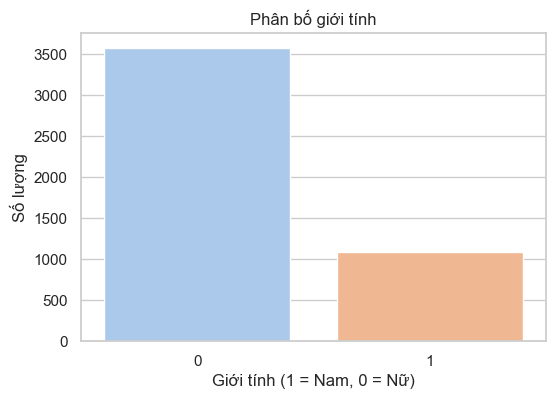

In [70]:
# Thiết lập phong cách hiển thị cho biểu đồ
sns.set(style="whitegrid")

# Phân tích dữ liệu: Phân bố giới tính
gender_counts = df_megre['GioiTinh'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Phân bố giới tính')
plt.xlabel('Giới tính (1 = Nam, 0 = Nữ)')
plt.ylabel('Số lượng')
plt.show()

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\2818576383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')


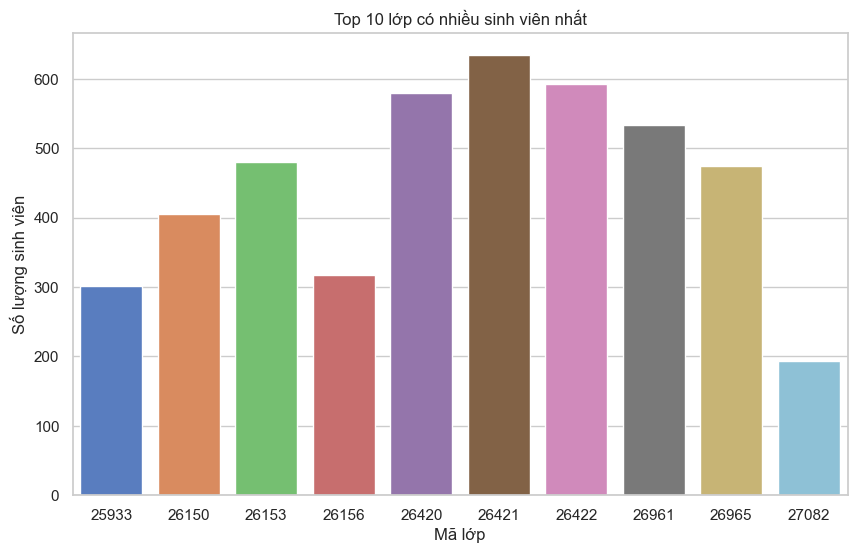

In [71]:
# Phân tích dữ liệu: Số lượng sinh viên theo lớp (top 10)
class_counts = df_megre['IDLopHoc'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')
plt.title('Top 10 lớp có nhiều sinh viên nhất')
plt.xlabel('Mã lớp')
plt.ylabel('Số lượng sinh viên')
plt.show()

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\3896507116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faculty_counts.index, y=faculty_counts.values, palette='pastel')


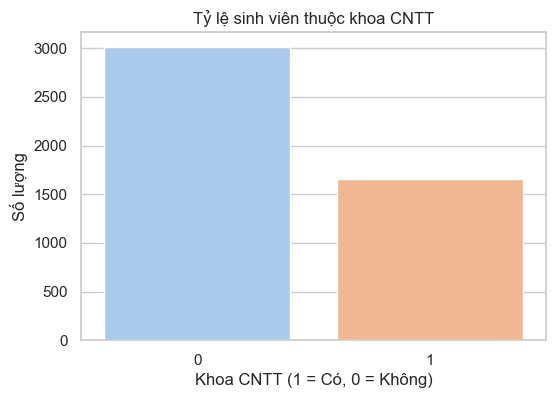

In [72]:
# Phân tích dữ liệu: Tỷ lệ sinh viên thuộc khoa CNTT
faculty_counts = df_megre['Thuộc KCNTT'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=faculty_counts.index, y=faculty_counts.values, palette='pastel')
plt.title('Tỷ lệ sinh viên thuộc khoa CNTT')
plt.xlabel('Khoa CNTT (1 = Có, 0 = Không)')
plt.ylabel('Số lượng')
plt.show()

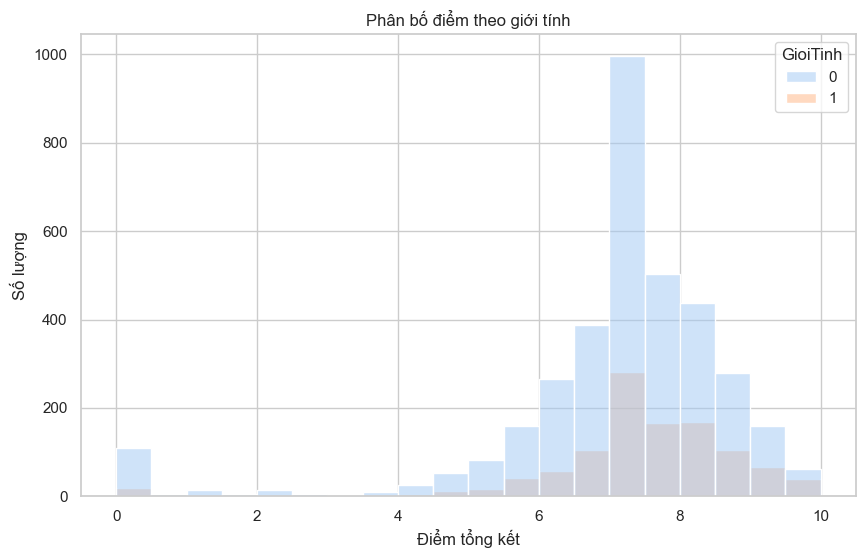

In [73]:
# phân bố điểm theo giới tính visual
plt.figure(figsize=(10, 6))
sns.histplot(df_megre, x='DiemTongKet', hue='GioiTinh', bins=20, palette='pastel')
plt.title('Phân bố điểm theo giới tính')
plt.xlabel('Điểm tổng kết')
plt.ylabel('Số lượng')
plt.show()

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\3106589654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_subjects.values, y=top_10_subjects.index, palette='muted')


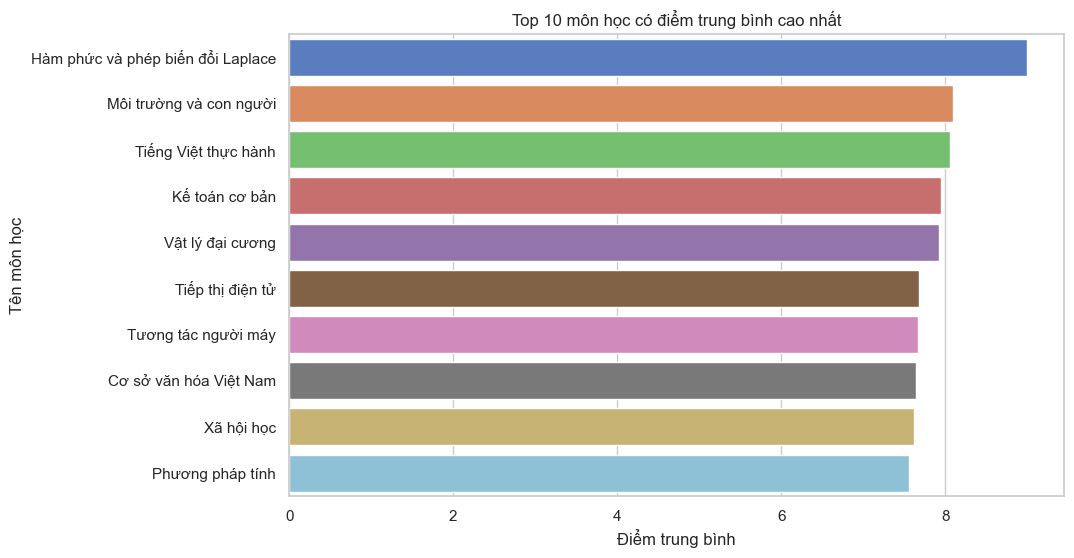

In [74]:
# visuallize Top 10 môn học điểm trung bình cao nhất
top_10_subjects = df_megre.groupby('Tên Môn').DiemTongKet.mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_subjects.values, y=top_10_subjects.index, palette='muted')
plt.title('Top 10 môn học có điểm trung bình cao nhất')
plt.xlabel('Điểm trung bình')
plt.ylabel('Tên môn học')
plt.show()

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\936907709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.values, y=subject_counts.index, palette='muted')


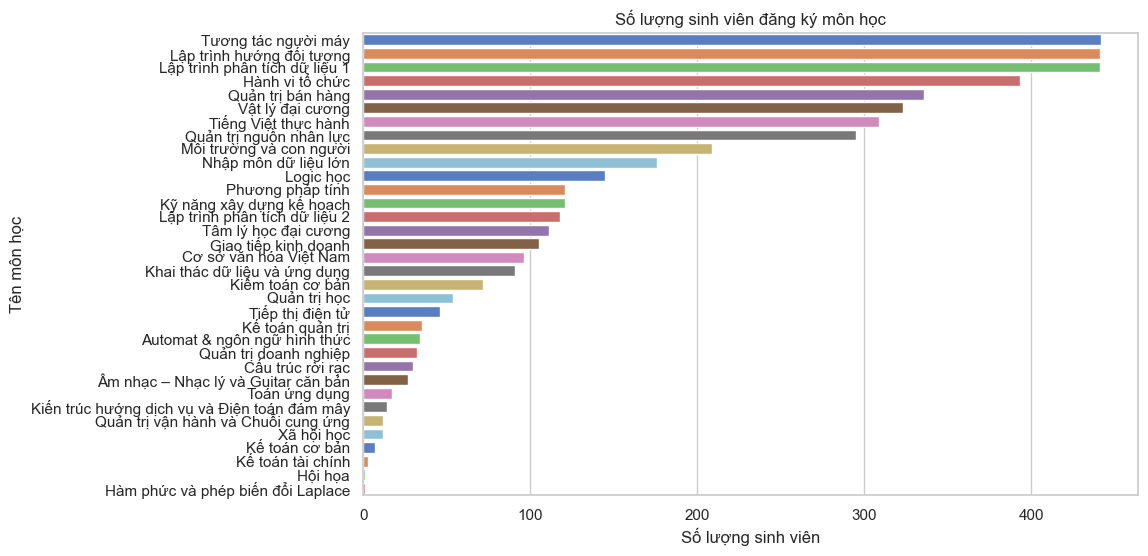

In [75]:
# Visualize Tên môn học và số lượng sinh viên đăng ký
subject_counts = df_megre['Tên Môn'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.values, y=subject_counts.index, palette='muted')
plt.title('Số lượng sinh viên đăng ký môn học')
plt.xlabel('Số lượng sinh viên')
plt.ylabel('Tên môn học')
plt.show()


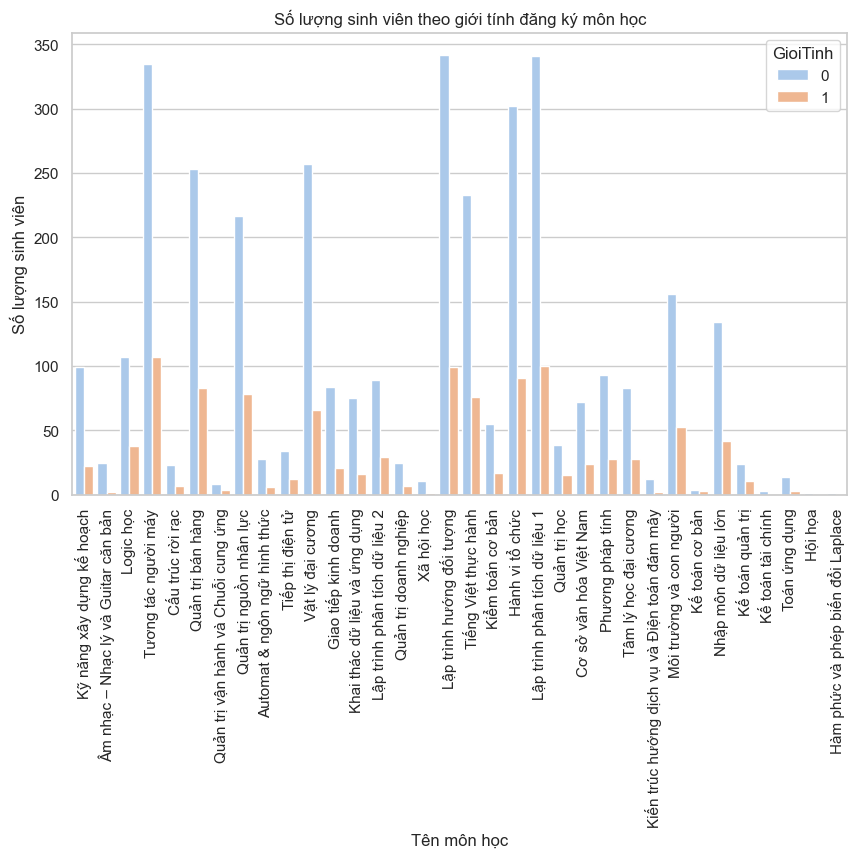

In [76]:
# Visualize Tên môn học và giới tính
plt.figure(figsize=(10, 6))
sns.countplot(data=df_megre, x='Tên Môn', hue='GioiTinh', palette='pastel')
plt.title('Số lượng sinh viên theo giới tính đăng ký môn học')
plt.xlabel('Tên môn học')
plt.ylabel('Số lượng sinh viên')
plt.xticks(rotation=90)
plt.show()

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\4247788895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Thuộc KCNTT', y='DiemTongKet', data=df_megre, palette='pastel')


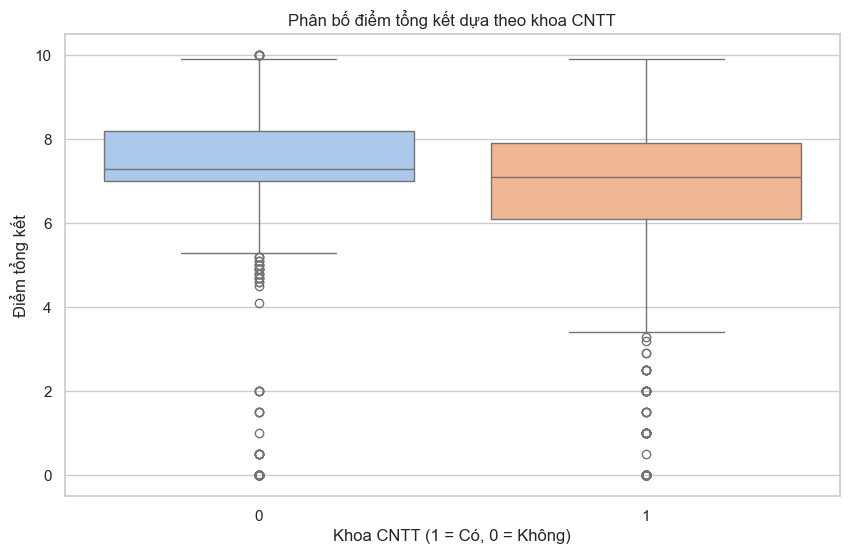

In [78]:
# Visuallize điểm tổng kết dựa theo cột Thuộc KCNTT
plt.figure(figsize=(10, 6))
sns.boxplot(x='Thuộc KCNTT', y='DiemTongKet', data=df_megre, palette='pastel')
plt.title('Phân bố điểm tổng kết dựa theo khoa CNTT')
plt.xlabel('Khoa CNTT (1 = Có, 0 = Không)')
plt.ylabel('Điểm tổng kết')
plt.show()

C:\Users\hoain\AppData\Local\Temp\ipykernel_6504\1606770599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DiemTongKet', y='Tên Môn', data=df_megre, palette='muted')


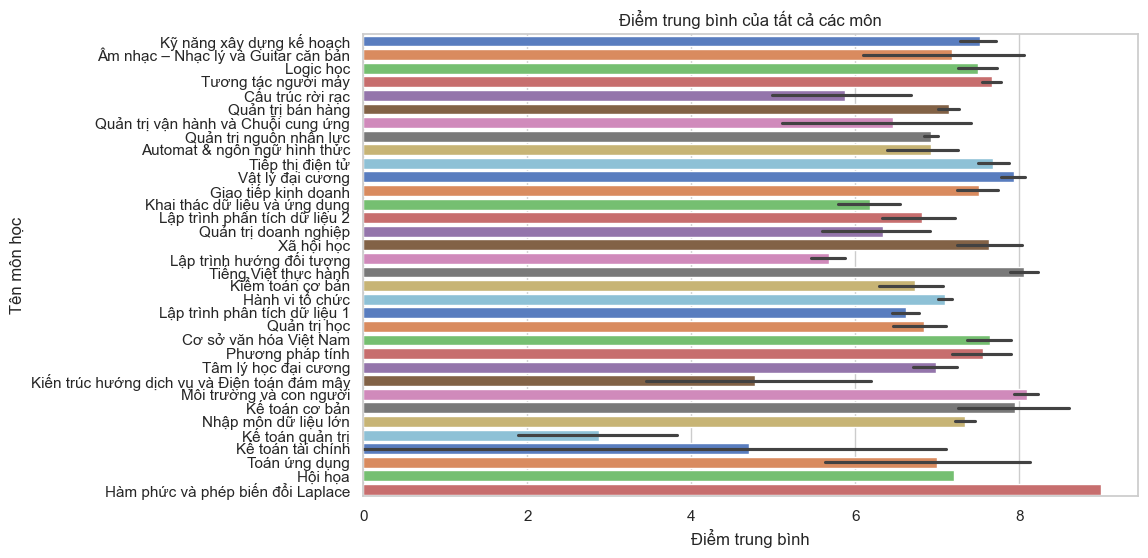

In [79]:
# Visuallize điểm trung bình của tất cả các môn. Cột y là tên môn học
plt.figure(figsize=(10, 6))
sns.barplot(x='DiemTongKet', y='Tên Môn', data=df_megre, palette='muted')
plt.title('Điểm trung bình của tất cả các môn')
plt.xlabel('Điểm trung bình')
plt.ylabel('Tên môn học')
plt.show()


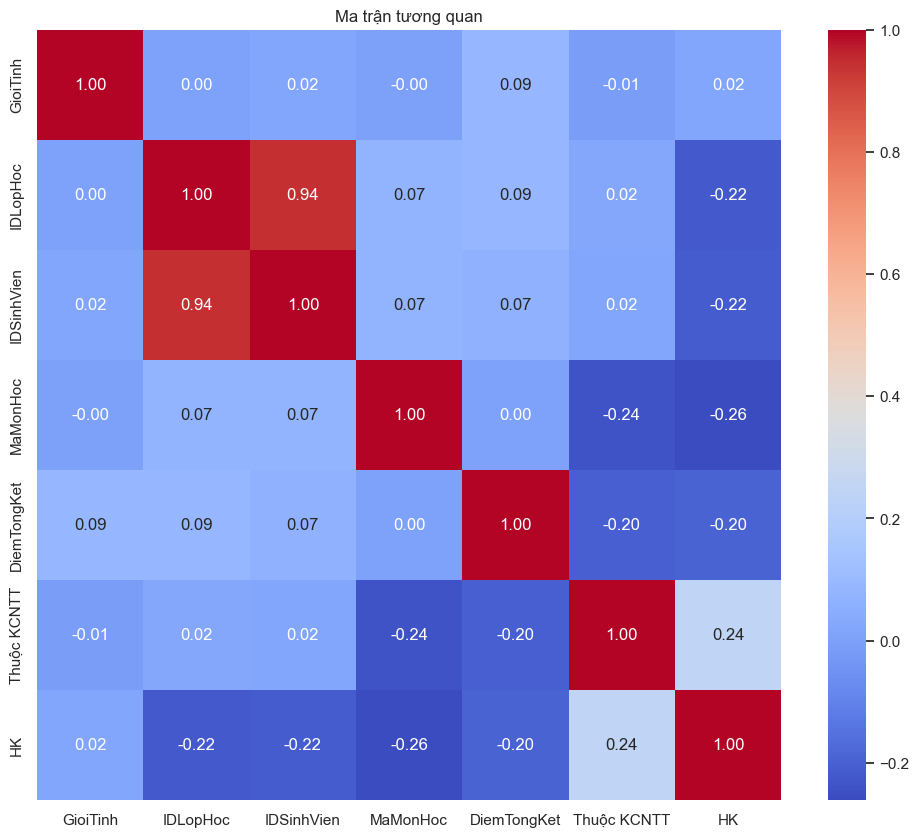

In [80]:
# Sử dụng One-Hot Encoding cho cột 'TenDot' (Học kỳ)
data_onehot = pd.get_dummies(df_megre, columns=['TenDot'], drop_first=True)

# Lọc ra các cột số để tính ma trận tương quan
numerical_data_onehot = data_onehot.select_dtypes(include=['int64', 'float64'])

# Tính toán ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_data_onehot.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan')
plt.show()